## import all the neccesarry libraries

In [251]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from torchvision import datasets
from torch.utils.data import Dataset
import torchvision
from torch.utils.data import Dataset, DataLoader
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torchinfo import summary
from tqdm.auto import tqdm

In [4]:
df =  pd.read_csv("person.csv")
df.head()

Response Id  You regularly make new friends.  \
0            0                                0   
1            1                                0   
2            2                                0   
3            3                                0   
4            4                                0   

   You spend a lot of your free time exploring various random topics that pique your interest  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            
3                                                 -1                                            
4                                                  0                                            

   Seeing other people cry can easily make you feel like you want to cry too  \
0                                                  0                           
1                                                 -2                           
2                                                  2                           
3                                                  3                           
4                                                 -1                           

   You often make a backup plan for a backup plan.  \
0                                                0   
1                                               -3   
2                                                0   
3                                               -1   
4                                                0   

   You usually stay calm, even under a lot of pressure  \
0                                                  0     
1                                                 -1     
2                                                 -1     
3                                                  0     
4                                                  2     

   At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know  \
0                                                  1                                                                   
1                                                  2                                                                   
2                                                  2                                                                   
3                                                  0                                                                   
4                                                 -1                                                                   

   You prefer to completely finish one project before starting another.  \
0                                                  1                      
1                                                 -2                      
2                                                  0                      
3                                                 -2                      
4                                                 -2                      

   You are very sentimental.  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   

   You like to use organizing tools like schedules and lists.  ...  \
0                                                  0           ...   
1                                                  3           ...   
2                                                  1           ...   
3                                                 -2           ...   
4                                                  1           ...   

   You believe that pondering abstract philosophical questions is a waste of time.  \
0                                                  0                                 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [6]:
df.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

# preprocessing the data

In [13]:
df = df.drop(["Response Id"],axis=1)

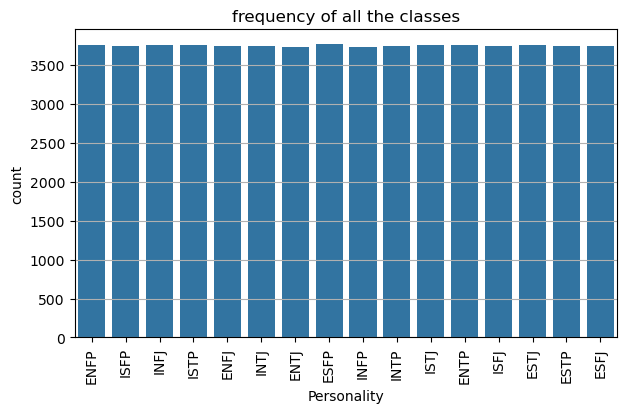

In [14]:
plt.figure(figsize=(7,4))
plt.grid()
sns.countplot(x=df["Personality"])
plt.title("frequency of all the classes")
plt.xticks(rotation=90)
plt.show()

## check weather if any classes overlapping or not

In [299]:
# Assuming the last column is the label and the rest are features
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Apply PCA
pca = PCA(n_components=2)
PCAs = pca.fit_transform(features)

In [19]:
PCAs[:,0]

array([0.37420306, 1.7658431 , 3.06537605, ..., 3.42077784, 3.77139268,
       1.81879558])

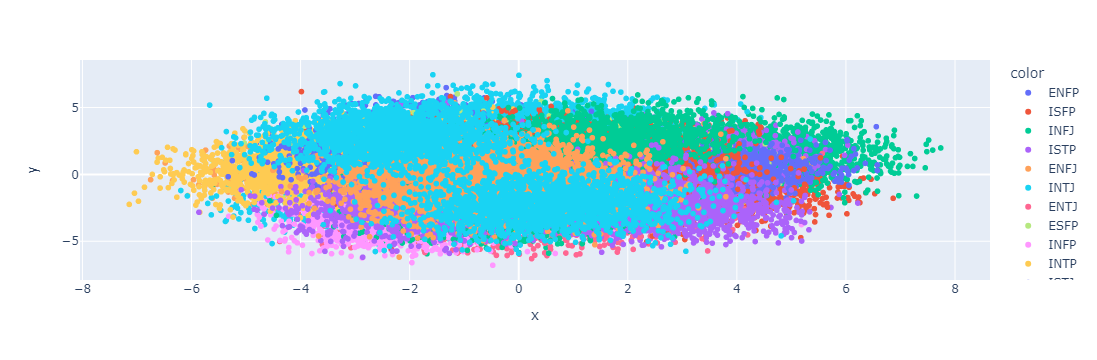

<Figure size 1200x1500 with 0 Axes>

In [26]:
plt.figure(figsize=(12,15))
# plt.title("PCA on the dataset to see all the classes cluster")
# sns.scatterplot(x=PCAs[:,0],y=PCAs[:,1],hue=labels)
fig = px.scatter(x=PCAs[:,0], y=PCAs[:,1],color=labels)
fig.show()
# plt.show()

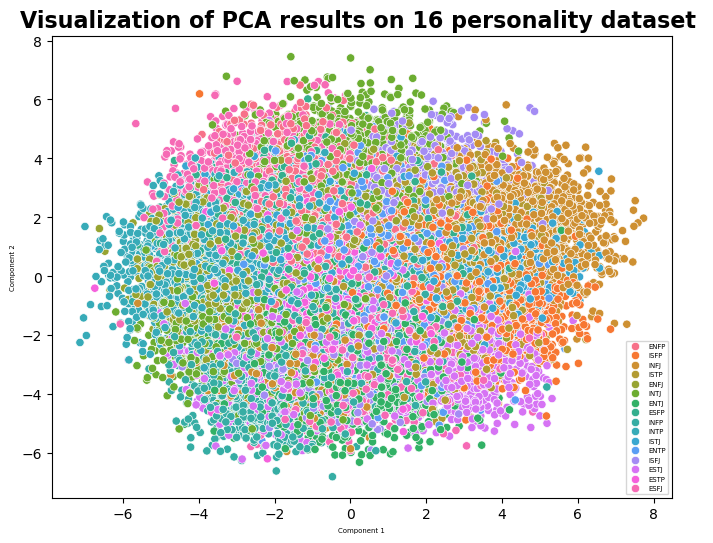

In [304]:
plt.figure(figsize=(8,6))
plt.title("Visualization of PCA results on 16 personality dataset ", fontsize=16, weight='bold')
sns.scatterplot(x=PCAs[:,0],y=PCAs[:,1],hue=labels)
plt.xlabel("Component 1", fontsize=5)
plt.ylabel("Component 2", fontsize=5)
plt.legend(fontsize=5,loc='lower right')
plt.show()

## extract only important columns 

In [43]:
# Perform PCA
pca1 = PCA()
pca.fit(features)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance for each component
print("Explained Variance by each component:", explained_variance)

# Determine number of components to explain 95% variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.where(cumulative_variance >= 0.95)[0] + 1

print("Number of components to explain 95% variance:", n_components)

# Transform the data
pca2 = PCA(n_components=n_components)
pca_data = pca.fit_transform(features)

# Get the principal components
components = pca.components_

# Print the principal components
print("Principal Components:\n", components)

Explained Variance by each component: [0.05100802 0.04902501 0.04363478 0.04181845 0.03925795 0.03849447
 0.03573394 0.03386249 0.03275856 0.03046112 0.02939987 0.02768154
 0.02732974 0.02491594 0.02411391 0.02272847 0.02208508 0.0210661
 0.02076804 0.01951116 0.01889986 0.01854722 0.01838149 0.01798212
 0.01765335 0.01744298 0.01712852 0.01648343 0.01631316 0.01581003
 0.01548351 0.01539433]
Number of components to explain 95% variance: []
Principal Components:
 [[ 1.94565946e-04  3.13953795e-04  9.68806231e-02 ... -1.37182383e-01
   1.89201261e-02 -7.35286597e-03]
 [ 3.19727717e-04 -5.41874400e-04  2.60461482e-01 ...  1.99402124e-01
   2.23446873e-02  2.20973412e-01]
 [-2.74330016e-04 -3.87930926e-04 -1.61006317e-02 ...  3.50398627e-02
  -2.59190004e-01 -1.15990970e-01]
 ...
 [ 1.97370019e-03 -2.47862671e-03 -2.91110159e-01 ... -9.77800844e-02
   1.09962832e-01 -8.58663797e-02]
 [ 1.04747694e-03 -4.28736971e-04 -3.00854490e-01 ... -1.53341814e-01
  -2.01598717e-01 -1.25443141e-01]
 [

In [64]:
index = []
for i in range(0,59):
    if (components[0][i])>=0:
        pass
    else:
        index.append(i)

new_df = df.drop(df.columns[index], axis = 1)
print(f"Important columns: {new_df.columns.tolist()}")

Important columns: ['You regularly make new friends.', 'You spend a lot of your free time exploring various random topics that pique your interest', 'Seeing other people cry can easily make you feel like you want to cry too', 'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know', 'You prefer to completely finish one project before starting another.', 'You are very sentimental.', 'You like to use organizing tools like schedules and lists.', 'You feel comfortable just walking up to someone you find interesting and striking up a conversation.', 'You are not too interested in discussing various interpretations and analyses of creative works.', 'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.', 'You rarely worry about whether you make a good impression on people you meet.', 'You like books and movies that make you come up with your own interpretation of the endi

In [66]:
new_df.head()

You regularly make new friends.  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   You spend a lot of your free time exploring various random topics that pique your interest  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            
3                                                 -1                                            
4                                                  0                                            

   Seeing other people cry can easily make you feel like you want to cry too  \
0                                                  0                           
1                                                 -2                           
2                                                  2                           
3                                                  3                           
4                                                 -1                           

   At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know  \
0                                                  1                                                                   
1                                                  2                                                                   
2                                                  2                                                                   
3                                                  0                                                                   
4                                                 -1                                                                   

   You prefer to completely finish one project before starting another.  \
0                                                  1                      
1                                                 -2                      
2                                                  0                      
3                                                 -2                      
4                                                 -2                      

   You are very sentimental.  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   

   You like to use organizing tools like schedules and lists.  \
0                                                  0            
1                                                  3            
2                                                  1            
3                                                 -2            
4                                                  1            

   You feel comfortable just walking up to someone you find interesting and striking up a conversation.  \
0                                                  0                                                      
1                                                 -2                                                      
2                                                  0                                                      
3                                                  2                                                      
4                                                  0                                                      

   You are not too interested in discussing various interpretations and analyses of creative works.  \
0                                                  1                                                  
1                                                  0                                                  
2 

## label encoding the data

In [68]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(new_df.iloc[:,-1])

# Get the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label mapping: {label_mapping}")

Label mapping: {'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}


In [72]:
labels_encoded

array([ 1, 13,  8, ..., 15, 14,  8])

In [73]:
x = new_df.iloc[:,:-1].values
y = labels_encoded
x.shape, y.shape

((59999, 33), (59999,))

## train test split the data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47999, 33), (12000, 33), (47999,), (12000,))

# KNN Algorithm

In [83]:
KNN_accuracies = []
for i in range(1,30):
    nbrs = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred = nbrs.predict(X_test)
    KNN_accuracies.append(accuracy_score(y_test, y_pred))

In [90]:
no_neighbors = [i for i in range(1, 30)]

Maximum Accuracy 0.9486666666666667 with nearest neighbors: 26


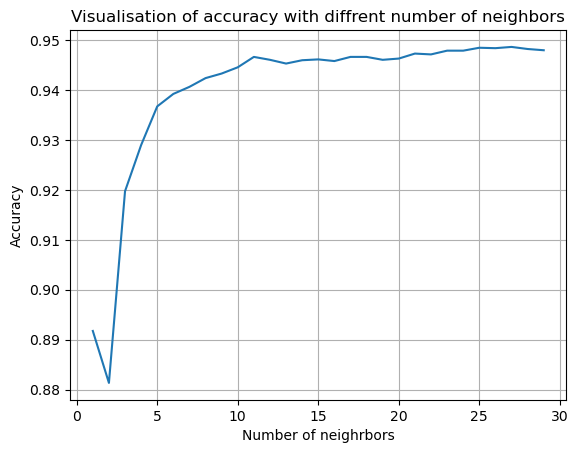

In [126]:
plt.grid()
sns.lineplot(x=no_neighbors,y=KNN_accuracies)
plt.title("Visualisation of accuracy with diffrent number of neighbors")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighrbors")
print(f"Maximum Accuracy {max(KNN_accuracies)} with nearest neighbors: {KNN_accuracies.index(max(KNN_accuracies))}")
plt.show()

# Decision Tree

In [115]:
max_features = [0.25,0.50,0.75,1.0]
max_depth = [2,4,6,8]
min_samples_leaf = [2,4,6,8]
min_samples_split = [3,5,7]

In [116]:
param_grid = {"max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [117]:
clf = DecisionTreeClassifier(random_state=42)

In [118]:
rf_grid = GridSearchCV(estimator = clf,
                      param_grid=param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [119]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\Users\Raunak Gola\code editor\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [3, 5, 7]},
             verbose=2)

In [120]:
rf_grid.best_params_

{'max_depth': 8,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [121]:
rf_grid.best_score_

0.4846352137375421

# SVM Algorithm

In [125]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_accuracies = []
for i in kernel:
    clf = SVC(kernel=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    SVM_accuracies.append(accuracy_score(y_test, y_pred))

Maximum Accuracy 0.94425 with nearest neighbors: poly


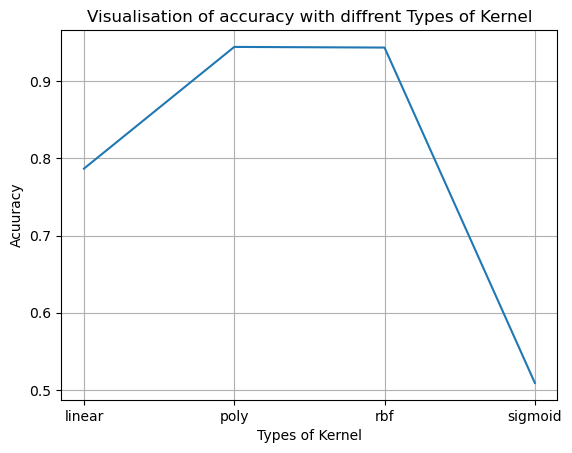

In [127]:
plt.grid()
sns.lineplot(x=kernel,y=SVM_accuracies)
plt.title("Visualisation of accuracy with diffrent Types of Kernel")
plt.ylabel("Acuuracy")
plt.xlabel("Types of Kernel")
print(f"Maximum Accuracy {max(SVM_accuracies)} with nearest neighbors: {kernel[SVM_accuracies.index(max(SVM_accuracies))]}")
plt.show()

# Random Forest Classifier

In [129]:
n_estimators = [20,60,100,120]
max_features = [0.25,0.50,0.75,1.0]
max_depth = [2,4,8]
max_samples = [0.25,0.50,0.75,1.0]
min_samples_leaf = [2,4,6,8]
min_samples_split = [3,5,7]

In [130]:
param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "max_samples":max_samples,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [132]:
rf = RandomForestClassifier()

In [134]:
rf_grid = GridSearchCV(estimator = rf,
                      param_grid=param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [135]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


C:\Users\Raunak Gola\code editor\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'max_samples': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [136]:
rf_grid.best_params_

{'max_depth': 8,
 'max_features': 0.25,
 'max_samples': 0.25,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 120}

In [137]:
rf_grid.best_score_

0.8094335130395527

# ANN in PyTorch

In [138]:
class PersonalityDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [139]:
train_dataset = PersonalityDataset(X_train, y_train)
test_dataset = PersonalityDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Device Agnostic Code

In [140]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

## building the model

In [241]:
# Replicating the above model using nn.Sequential()
torch.manual_seed(5)
model = nn.Sequential(
    nn.Linear(in_features=33,out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64,out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64,out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64,out_features=16)
).to(device)

In [242]:
summary(model,input_shape=(1,33))

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            2,176
├─ReLU: 1-2                              --
├─Linear: 1-3                            4,160
├─ReLU: 1-4                              --
├─Linear: 1-5                            4,160
├─ReLU: 1-6                              --
├─Linear: 1-7                            1,040
Total params: 11,536
Trainable params: 11,536
Non-trainable params: 0

## Setting-up Loss Function and Optimizer

In [243]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

## Early Stopping

In [244]:
# Early stopping class definition (if not already defined)
class EarlyStopping:
    def __init__(self, patience=5, delta=0.001, restore_best_weights=True, path='checkpoint.pth', verbose=False):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.path = path
        self.early_stop = False

    def __call__(self, val_loss, model):
        loss = val_loss

        if self.best_loss is None:
            self.best_loss = loss
            torch.save(model.state_dict(), self.path)
            # print("saved model1")
        elif loss - self.best_loss >=  self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = loss
            if self.restore_best_weights:
                torch.save(model.state_dict(), self.path)
            
            self.counter = 0
# Initialize early stopping
early_stopping = EarlyStopping(patience=10, verbose=True)

In [245]:
train_images,train_labels = next(iter(train_loader))
print(f"Shape of image: {train_images.shape} | Shape of label: {train_labels.shape}")

Shape of image: torch.Size([64, 33]) | Shape of label: torch.Size([64])


## Training Loop

In [246]:
# Training loop
num_epochs = 25
trainloss, testloss = [], []
trainaccuracy, testaccuracy = [], []

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    
    for train_values, train_labels in train_loader:
        train_values, train_labels = train_values.to(device), train_labels.to(device)
        optimizer.zero_grad()
        outputs = model(train_values)
        train_loss = loss_fn(outputs, train_labels)
        train_loss.backward()
        optimizer.step()
        
        _, train_pred = torch.max(outputs.data, dim=1)
        correct_train += (train_pred == train_labels).sum().item()
        running_train_loss += train_loss.item()
    
    avg_train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / len(train_loader.dataset)
    
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    
    with torch.no_grad():
        for test_values, test_labels in test_loader:
            test_values, test_labels = test_values.to(device), test_labels.to(device)
            test_outputs = model(test_values)
            test_loss = loss_fn(test_outputs, test_labels)
            _, test_pred = torch.max(test_outputs.data, 1)
            correct_test += (test_pred == test_labels).sum().item()
            running_test_loss += test_loss.item()
    
    avg_test_loss = running_test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / len(test_loader.dataset)
    
    trainloss.append(avg_train_loss)
    testloss.append(avg_test_loss)
    trainaccuracy.append(train_accuracy)
    testaccuracy.append(test_accuracy)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}% | Test Loss: {avg_test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%')
    
    early_stopping(avg_test_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Load the last checkpoint with the best model
# model.load_state_dict(torch.load('checkpoint.pth'))

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [1/25] | Train Loss: 0.9139 | Train Accuracy: 73.25% | Test Loss: 0.5175 | Test Accuracy: 85.21%
Epoch [2/25] | Train Loss: 0.4646 | Train Accuracy: 86.72% | Test Loss: 0.4351 | Test Accuracy: 87.86%
Epoch [3/25] | Train Loss: 0.4030 | Train Accuracy: 88.60% | Test Loss: 0.3950 | Test Accuracy: 89.19%
Epoch [4/25] | Train Loss: 0.3678 | Train Accuracy: 89.87% | Test Loss: 0.3834 | Test Accuracy: 89.37%
Epoch [5/25] | Train Loss: 0.3474 | Train Accuracy: 90.57% | Test Loss: 0.3700 | Test Accuracy: 90.19%
Epoch [6/25] | Train Loss: 0.3293 | Train Accuracy: 91.19% | Test Loss: 0.3559 | Test Accuracy: 90.52%
Epoch [7/25] | Train Loss: 0.3169 | Train Accuracy: 91.59% | Test Loss: 0.3536 | Test Accuracy: 90.74%
Epoch [8/25] | Train Loss: 0.3070 | Train Accuracy: 91.95% | Test Loss: 0.3492 | Test Accuracy: 90.70%
Epoch [9/25] | Train Loss: 0.2970 | Train Accuracy: 92.28% | Test Loss: 0.3456 | Test Accuracy: 91.12%
Epoch [10/25] | Train Loss: 0.2894 | Train Accuracy: 92.46% | Test Loss: 

In [247]:
model.load_state_dict(torch.load('checkpoint.pth'))

<All keys matched successfully>

In [248]:
torch.save(model,'./personality_classifier.pth')

In [249]:
e = []
for i in range(1,26):
    e.append(i)

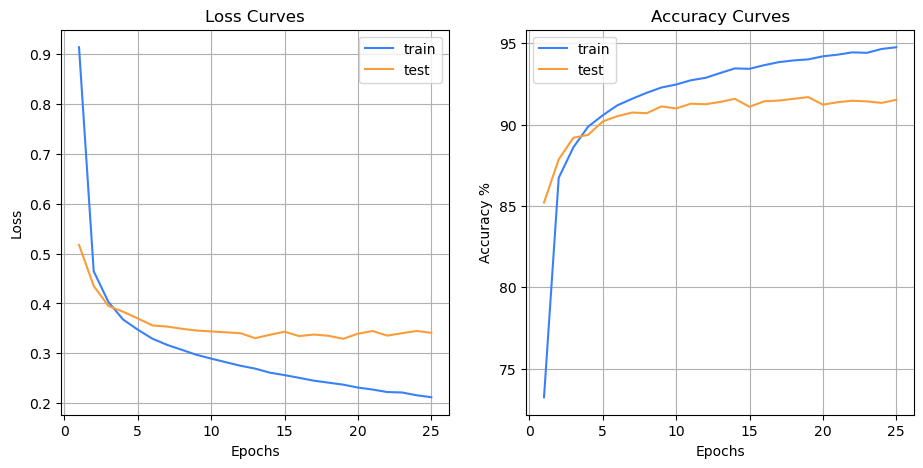

In [250]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(e,trainloss,color='#3980fa')
plt.plot(e,testloss,color='#fa9d39')
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(e,trainaccuracy,color='#3980fa')
plt.plot(e,testaccuracy,color='#fa9d39')
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.legend(['train','test'])
plt.show()

In [297]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_pred.extend(predicted.tolist())
        y_true.extend(labels.tolist())

    accuracy = accuracy_score(y_true,y_pred)
    print(f'Accuracy: {accuracy*100}%\n')
    print("Classification Report")
    print(classification_report(y_true,y_pred))


Accuracy: 91.69166666666668%

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       739
           1       0.94      0.91      0.92       773
           2       0.93      0.92      0.93       738
           3       0.95      0.92      0.93       748
           4       0.89      0.93      0.91       770
           5       0.92      0.95      0.93       790
           6       0.90      0.91      0.91       739
           7       0.93      0.88      0.91       773
           8       0.93      0.94      0.94       775
           9       0.89      0.90      0.89       749
          10       0.89      0.92      0.90       699
          11       0.91      0.86      0.89       744
          12       0.91      0.90      0.90       753
          13       0.94      0.92      0.93       745
          14       0.89      0.93      0.91       740
          15       0.92      0.93      0.92       725

    accuracy                

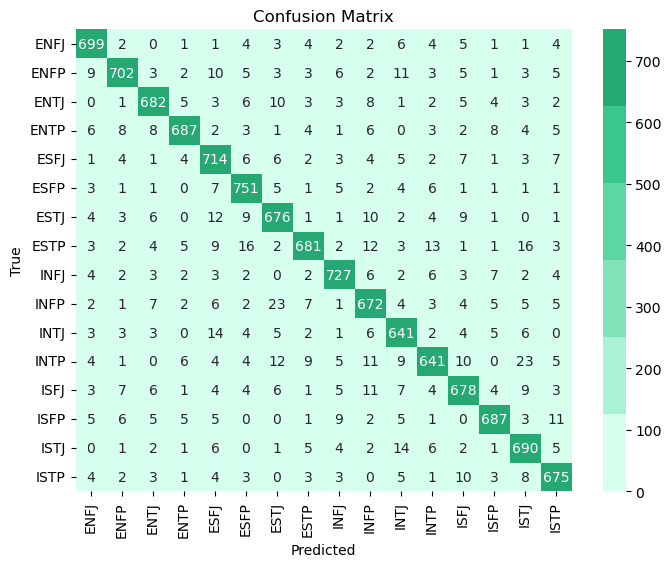

In [296]:
# Convert to numpy arrays for sklearn
y_pred = np.array(y_pred)
y_true = np.array(y_true)
classes = label_encoder.classes_.tolist()
blue = ['#d7ffee','#aaf2d4','#81e3ba','#5cd6a3','#3ac78c','#25a872']
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=blue,xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## now some model analysis

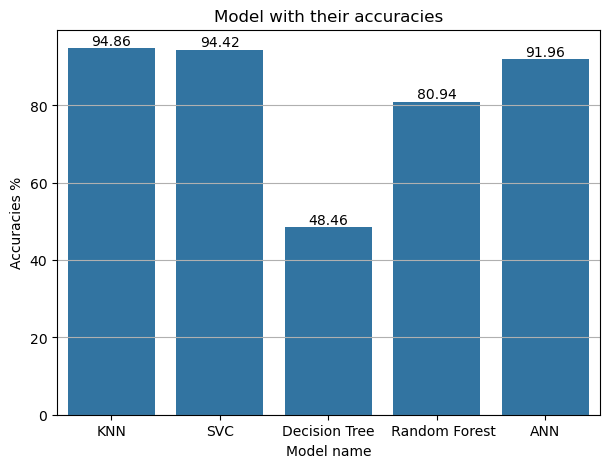

In [295]:
model_name = ['KNN','SVC','Decision Tree','   Random Forest','ANN']
accuracy = [94.86,94.42,48.46,80.94,91.96]
plt.figure(figsize=(7,5))
plt.grid()
ax = sns.barplot(x=model_name,y=accuracy)#.bar_label(accuracy)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Model with their accuracies")
plt.xlabel("Model name")
plt.ylabel("Accuracies %")
plt.show()